## load package

In [7]:
import google.datalab.storage as storage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
from google.datalab import Context
import random, string
import warnings

p = sns.color_palette()

## load data

In [8]:
my_bucket = storage.Bucket('capstone-01/data')
events = my_bucket.object('events.csv')
uri = events.uri
%gcs read --object $uri --variable c_test
events = pd.read_csv(BytesIO(c_test))
events.head(5)

/usr/local/envs/py3env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,display_id,uuid,document_id,timestamp,platform,geo_location
0,1,cb8c55702adb93,379743,61,3,US>SC>519
1,2,79a85fa78311b9,1794259,81,2,US>CA>807
2,3,822932ce3d8757,1179111,182,2,US>MI>505
3,4,85281d0a49f7ac,1777797,234,2,US>WV>564
4,5,8d0daef4bf5b56,252458,338,2,SG>00


## shape and colnames

In [5]:
# events의 행렬 개수
print(events.shape)

# events의 컬럼명
events_col = events.columns.tolist()
print(events_col)

# events의 display_id, uuid, document_id의 unique 개수
print(events['display_id'].unique().shape)
print(events['uuid'].unique().shape)
print(events['document_id'].unique().shape)

(23120126, 6)
['display_id', 'uuid', 'document_id', 'timestamp', 'platform', 'geo_location']
(23120126,)
(19794967,)
(894060,)


## display_id

In [6]:
# display_id는 전부 다 unique한 값
dis_counts = events.groupby('display_id')['display_id'].count().sort_values()
print(dis_counts.head())
print(len(events.display_id.unique()))

display_id
1           1
15413422    1
15413421    1
15413420    1
15413419    1
Name: display_id, dtype: int64
23120126


## uuid

uuid
ef7761dd22277c    38
45d23867dbe3b3    38
c0bd502c7a479f    42
2759b057797f02    46
b88553e3a2aa29    49
Name: uuid, dtype: int64
Users that appear less than 2 times: 88.42%
Users that appear less than 5 times: 99.51%
Users that appear less than 10 times: 99.96%


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


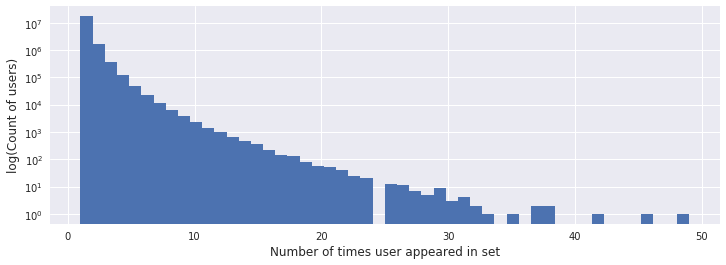

In [4]:
# unique user id 개수 확인
uuid_counts = events.groupby('uuid')['uuid'].count().sort_values()
print(uuid_counts.tail())

for i in [2, 5, 10]:
    print('Users that appear less than {} times: {}%'.format(i, round((uuid_counts<i).mean() * 100, 2)))
    
# 시각화
plt.figure(figsize=(12,4))
plt.hist(uuid_counts.values, bins=50, log=True)
plt.xlabel('Number of times user appeared in set', fontsize=12)
plt.ylabel('log(Count of users)', fontsize=12)
plt.show()

In [9]:
uuid_displayid_counts = events.groupby('uuid')['display_id'].count().sort_values()
print(uuid_displayid_counts.shape)
print(uuid_displayid_counts.tail())

(19794967,)
uuid
ef7761dd22277c    38
45d23867dbe3b3    38
c0bd502c7a479f    42
2759b057797f02    46
b88553e3a2aa29    49
Name: display_id, dtype: int64


## document_id

In [8]:
# document_id의 unique 개수는 894,060 (전체의 3.8%)
doc_counts = events.groupby('document_id')['document_id'].count().sort_values()
print(len(events.document_id.unique()))
print(len(events.document_id.unique())/23120126)

# 동일한 document_id라도 사용자(uuid)에 따라 display_id가 다름
doc_example = events[events.document_id == 1027695]
print(doc_example.head())

894060
0.03867020447898943
       display_id            uuid  document_id  timestamp platform  \
18636       18637  decd617870973b      1027695    1316276        1   
27307       27308  58e12ee1cd8a17      1027695    1977635        2   
38083       38084  f23ce7c665ce5a      1027695    2862938        2   
63790       63791  1eb996e9b374c9      1027695    5183875        1   
66112       66113  6fe70cadf3ddda      1027695    5408387        2   

      geo_location  
18636    US>IA>725  
27307    US>MD>511  
38083    US>CA>803  
63790    US>CT>533  
66112    US>CA>862  


## platform

2     10684579
1      8747280
3      3032907
2       291699
1       279988
3        83668
\N           5
Name: platform, dtype: int64

Unique values of platform: [3 2 1 '2' '1' '3' '\\N']


Text(0,0.5,'Occurence count')

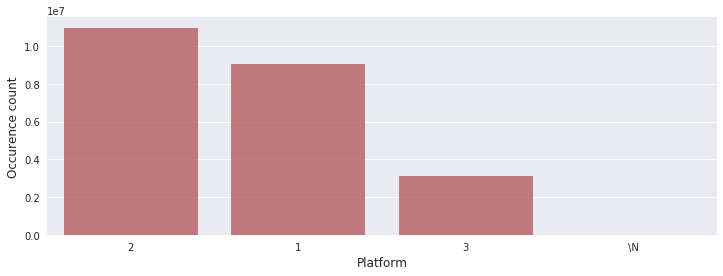

In [9]:
# 경고 메시지 무시
warnings.filterwarnings(action='ignore')

# 플랫폼 별 개수 확인
plat = events.platform.value_counts()
print(plat)
print('\nUnique values of platform:', events.platform.unique())

# 플랫폼 명을 모두 str 타입으로 변경
events.platform = events.platform.astype(str)
plat = events.platform.value_counts()

# 시각화
plt.figure(figsize=(12,4))
sns.barplot(plat.index, plat.values, alpha=0.8, color=p[2])
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Occurence count', fontsize=12)

## geo_location

In [3]:
events_geo = events.geo_location.str[:2]
events_geo_unq = events_geo.unique()
print(events_geo_unq.shape)
print(events_geo_unq)

(231,)
['US' 'SG' 'GB' 'AU' 'IN' 'PR' 'CA' 'PH' 'ZA' 'AE' 'JP' 'KR' 'GN' 'ID'
 'NZ' 'TW' 'OM' 'IL' 'TT' 'MX' 'HK' 'FR' 'SE' 'AT' 'FI' 'RU' 'QA' 'MY'
 'IE' 'VN' 'GR' 'DE' 'PY' 'TH' 'CO' 'EU' 'GT' 'BO' 'NG' 'JM' 'BG' 'FJ'
 'NL' 'CN' 'LK' 'LV' 'CH' 'BR' 'LB' 'NO' 'DK' 'TZ' 'AR' 'PK' 'DZ' 'CZ'
 'IT' 'KW' 'GU' 'CL' 'FX' 'SV' 'RO' 'SA' 'CR' 'GH' 'KE' 'RS' 'PA' 'KH'
 'TR' 'ES' 'UG' 'BE' 'BD' 'JE' 'PG' 'SR' 'MT' 'AN' 'VE' 'PE' 'HU' 'MK'
 'AD' 'UA' 'LT' 'BN' 'BZ' 'EC' 'GY' 'BY' 'NC' 'HR' 'SI' 'VI' 'AW' 'SC'
 'NP' 'BH' 'AP' 'PL' 'MO' 'MW' 'IS' 'MV' 'HN' 'HT' 'BW' 'DO' 'MA' 'BS'
 'CM' 'CY' 'MD' 'BB' 'AG' 'ET' 'MU' 'EG' 'SB' 'JO' 'ZW' 'KZ' 'LC' 'CI'
 'LS' 'SK' 'AO' 'ZM' 'BM' 'ER' 'UY' 'AM' 'AS' 'IQ' 'GE' 'NI' 'BF' 'CD'
 'PT' 'GM' 'LU' 'AL' 'NA' 'A1' 'BA' 'GI' 'EE' 'SZ' 'ME' 'RE' 'BT' 'MN'
 '--' 'PW' 'LR' nan 'MP' 'TN' 'TC' 'IM' 'NE' 'MF' 'PS' 'GA' 'MQ' 'CK' 'SO'
 'FM' 'A2' 'RW' 'VU' 'KN' 'MC' 'KY' 'MZ' 'VG' 'AF' 'GG' 'LY' 'AZ' 'UZ'
 'GP' 'BJ' 'GQ' 'SL' 'TL' 'LA' 'TG' 'KG' 'TM' 'SN' 'YE' 'TO' 'PF' 

In [4]:
events_usa = events[events.geo_location.str[:2] == 'US']
print(events_usa.head(10))
print(len(events_usa)) # 18595452
print(18595452/23120126)
# US가 전체 데이터의 80%를 차지한다

    display_id            uuid  document_id  timestamp platform geo_location
0            1  cb8c55702adb93       379743         61        3    US>SC>519
1            2  79a85fa78311b9      1794259         81        2    US>CA>807
2            3  822932ce3d8757      1179111        182        2    US>MI>505
3            4  85281d0a49f7ac      1777797        234        2    US>WV>564
5            6  7765b4faae4ad4      1773517        395        3    US>OH>510
6            7  2cc3f6457d16da      1149661        602        2    US>MT>762
7            8  166fc654d73c98      1330329        638        2    US>PA>566
8            9  9dddccf70f6067      1772126        667        1    US>FL>528
9           10  b09a0e92aa4d17       157455        693        1           US
10          11  602e210c5831e5      1773230        710        3    US>IL>675
18595452
0.80429717381298


In [5]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# state 별 데이터 개수 카운트
usa = events_usa.loc[events_usa.geo_location.str[:2]=='US', :]
usa = usa[["uuid", "geo_location"]]
usa.columns = ['uuid', 'State']
usa.State = usa.State.str[3:5]
usa = usa.loc[usa.State != '', :]
usa.loc[:, 'UserCount'] = usa.groupby('State')['State'].transform('count')
usa.loc[:, ['State', 'UserCount']] = usa.loc[:, ['State', 'UserCount']].drop_duplicates('State', keep='first')
usa.sort_values('UserCount', ascending=False, inplace=True)

# state 코드와 매칭, StateName 열 생성
stateCode2Name = {'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine', 'MI': 'Michigan', 'MN':'Minnesota', 'MO': 'Missouri', 'MP': 'Northern Mariana Islands', 'MS': 'Mississippi', 'MT': 'Montana', 'NA': 'National', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE':'Nebraska', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia', 'VI': 'Virgin Islands', 'VT': 'Vermont', 'WA': 'Washington', 'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'}
usa['StateName'] = usa['State'].map(stateCode2Name)
usa.dropna(inplace=True)

# state 별 누적퍼센트 계산
usa['CumulativePercentage'] = 100 * usa.UserCount.cumsum()/usa.UserCount.sum()
usa.reset_index(drop=True, inplace=True)
usa[['StateName', 'UserCount', 'CumulativePercentage']].head(50)

,StateName,UserCount,CumulativePercentage
0,California,2395278.0,13.436487
1,Texas,1645323.0,22.666047
2,Florida,1128279.0,28.995211
3,New York,1105926.0,35.198984
4,Pennsylvania,784612.0,39.600322
5,Illinois,745661.0,43.783162
6,Ohio,633699.0,47.337943
7,Michigan,623564.0,50.835871
8,North Carolina,597003.0,54.184803
9,New Jersey,537440.0,57.199612


## timestamp

In [4]:
# timestamp 전처리를 통해 datetime 형태로 만들기
events.loc[:, 'timestamp'] = [i + 1465876799998 for i in events.loc[:, 'timestamp']]
events.loc[:, 'timestamp'] = pd.to_datetime(events.loc[:, 'timestamp'], unit='ms')
events.tail()

,display_id,uuid,document_id,timestamp,platform,geo_location
23120121,23120122,3b42aaa4aa8993,1827718,2016-06-29 03:59:59.572,1,US>FL>571
23120122,23120123,7efccdc2d58fd1,2984543,2016-06-29 03:59:59.589,2,US>TX>623
23120123,23120124,11f9ac8cee26f2,751048,2016-06-29 03:59:59.655,2,US>GA>524
23120124,23120125,6bbdc5756789cc,744496,2016-06-29 03:59:59.769,2,US>MI>505
23120125,23120126,b545c100626cba,2357447,2016-06-29 03:59:59.803,2,US>SD>764


In [5]:
# 미국의 주별 utc-time-offset을 정리한 usa_utftime.csv 파일 가져오기
usa_utftime = my_bucket.object('usa-state-utctime-new.csv')
uri = usa_utftime.uri
%gcs read --object $uri --variable c_test
usa_utftime = pd.read_csv(BytesIO(c_test))
usa_utftime = usa_utftime[['state_new', 'UTC.time.offset']]
usa_utftime.head(5)

,state_new,UTC.time.offset
0,AL,-06:00
1,AK,-09:00
2,AZ,-07:00
3,AR,-06:00
4,CA,-08:00


In [6]:
# usa_utftime을 추후 연산하기 좋게 가공하여 usa_utftime_final로 만듦
usa_utftime['UTC.time.offset'] = usa_utftime['UTC.time.offset'].astype(str)
usa_utftime['time'] = usa_utftime['UTC.time.offset'].str[1:3]
usa_utftime.columns = ['state', 'offset', 'time']
usa_utftime_final = usa_utftime[['state', 'time']]

usa_utftime_final.head()

,state,time
0,AL,06
1,AK,09
2,AZ,07
3,AR,06
4,CA,08


In [7]:
# events에서 지역이 usa인 데이터 추출한 usa_only와 usa_utftime_final을 merge
events_usa = events[events.geo_location.str[:2] == 'US']
usa_only = events_usa.loc[events_usa.geo_location.str[:2]=='US', :]
usa_only['state'] = usa_only['geo_location'].str[3:5]
usa_only.head()
usa_final = pd.merge(usa_only, usa_utftime_final, on='state', how='left')
usa_final.head()

,display_id,uuid,document_id,timestamp,platform,geo_location,state,time
0,1,cb8c55702adb93,379743,2016-06-14 04:00:00.059,3,US>SC>519,SC,05
1,2,79a85fa78311b9,1794259,2016-06-14 04:00:00.079,2,US>CA>807,CA,08
2,3,822932ce3d8757,1179111,2016-06-14 04:00:00.180,2,US>MI>505,MI,05
3,4,85281d0a49f7ac,1777797,2016-06-14 04:00:00.232,2,US>WV>564,WV,05
4,6,7765b4faae4ad4,1773517,2016-06-14 04:00:00.393,3,US>OH>510,OH,05


In [72]:
# state NA 값 비율 = 4%
768784 / 18595452 * 100

4.134258204640576

In [57]:
# example of calculating datetime
now = datetime.datetime.now()
a=1
one_hour_later = now + datetime.timedelta(hours=a)
one_hour_later
type(a)

int

In [8]:
# usa_final에서 na 없는 데이터의 shape 확인하기
nans = lambda df: df[df.isnull().any(axis=1)]
usa_nans = nans(usa_final)
print(usa_nans.shape)
usa_nans.tail(15)

(768784, 8)


,display_id,uuid,document_id,timestamp,platform,geo_location,state,time
18594937,23119519,2abdc2f0cd76ac,484475,2016-06-29 03:59:21.765,2,US,,NaN
18594952,23119536,45adb429b81210,2931377,2016-06-29 03:59:22.512,1,US>AE,AE,NaN
18594966,23119551,dba159332df45e,2909627,2016-06-29 03:59:23.851,3,US,,NaN
18594992,23119583,d4ba016292adb5,2963871,2016-06-29 03:59:25.965,1,US,,NaN
18595118,23119734,6e0e8577b6ead8,1291502,2016-06-29 03:59:35.152,2,US>AE,AE,NaN
18595136,23119755,b81f174de49150,2977515,2016-06-29 03:59:36.111,2,US,,NaN
18595195,23119821,caee0432388da7,2847511,2016-06-29 03:59:40.887,2,US,,NaN
18595199,23119826,a5bfab58168a19,2992437,2016-06-29 03:59:41.245,2,US,,NaN
18595286,23119926,9fcbedbd7c6a18,2991411,2016-06-29 03:59:47.316,2,US,,NaN
18595359,23120013,c3662fc0bbc528,2998869,2016-06-29 03:59:53.045,2,US,,NaN


In [9]:
# na 없는 행만 추출해서 usa_final_nona 만듦
usa_final_nona = usa_final.dropna()
usa_final_nona['real_timestamp'] = usa_final_nona['timestamp']
# usa_final_nona['time'] = usa_final_nona['time'].astype(int)
usa_final_nona.head()
# usa_final.loc[usa_final['time'].notnull(), 'time'] = usa_final.loc[usa_final['time'].notnull(), 'time'].apply(int)

/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,display_id,uuid,document_id,timestamp,platform,geo_location,state,time,real_timestamp
0,1,cb8c55702adb93,379743,2016-06-14 04:00:00.059,3,US>SC>519,SC,05,2016-06-14 04:00:00.059
1,2,79a85fa78311b9,1794259,2016-06-14 04:00:00.079,2,US>CA>807,CA,08,2016-06-14 04:00:00.079
2,3,822932ce3d8757,1179111,2016-06-14 04:00:00.180,2,US>MI>505,MI,05,2016-06-14 04:00:00.180
3,4,85281d0a49f7ac,1777797,2016-06-14 04:00:00.232,2,US>WV>564,WV,05,2016-06-14 04:00:00.232
4,6,7765b4faae4ad4,1773517,2016-06-14 04:00:00.393,3,US>OH>510,OH,05,2016-06-14 04:00:00.393


In [ ]:
import datetime
usa_final_nona['time'] = usa_final_nona['time'].apply(lambda x: usa_final_nona['timestamp'] - datetime.timedelta(hours=int(x)))

In [44]:
b = usa_final_nona['time']
c = usa_final_nona['time']
b+c

0           10
1           16
2           10
3           10
4           10
5           14
6           10
7           10
9           12
10          12
11          14
12          10
13          10
14          10
15          16
16          20
17          10
18          10
19          10
20          16
21          10
22          16
23          10
24          12
25          10
26          10
27          10
28          16
29          16
30          10
            ..
18595420    16
18595421    10
18595422    12
18595423    10
18595424    12
18595425    16
18595427    10
18595428    16
18595429    14
18595430    12
18595431    12
18595432    16
18595433    14
18595434    10
18595435    16
18595436    10
18595437    10
18595438    16
18595439    12
18595440    12
18595442    10
18595443    12
18595444    10
18595445    12
18595446    12
18595447    10
18595448    12
18595449    10
18595450    10
18595451    12
Name: time, Length: 17826668, dtype: int64

In [1]:
usa_final_nona['time'] = usa_final_nona['time'].apply(lambda x: usa_final_nona['timestamp'] - datetime.timedelta(hours=int(x)))
# usa_final_nona['real_timestamp'] = usa_final_nona['timestamp'] + datetime.timedelta(hours=int(usa_final_nona['time']))

NameError: name 'usa_final_nona' is not defined

In [36]:
# time의 type이 numpy.int64이라 자꾸 오류남 -> 아래 for문에서 int() 씌워줌
type(usa_final_nona['time'].iloc[3])

numpy.int64

In [33]:
usa_final_nona['real_timestamp'] = usa_final_nona['timestamp']
usa_final_nona.head()

/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/envs/py3env/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


RecursionError: maximum recursion depth exceeded

RecursionError: maximum recursion depth exceeded

In [29]:
usa_final_nona['time'] = usa_final_nona['time'].to_frame()
type(usa_final_nona['time'])
# usa_final_nona['time'] = pd.to_numeric(usa_final_nona['time']).round(0).astype(int)

/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


pandas.core.series.Series

pandas.core.series.Series

In [19]:
import datetime
usa_final_nona['real_timestamp'] = usa_final_nona['real_timestamp'] - datetime.timedelta(hours=usa_final_nona['time'])

TypeError: unsupported type for timedelta hours component: Series

In [ ]:
# 시도했으나 잘 안 됨!
for i in range(0, 17826668): # usa_final_nona 길이
  usa_final_nona['real_timestamp'].iloc[i] = usa_final_nona['timestamp'].iloc[i].to_pydatetime()
  usa_final_nona['real_timestamp'].iloc[i] = usa_final_nona['real_timestamp'].iloc[i] - datetime.timedelta(hours=int(usa_final_nona['time'].iloc[i]))

## merge (events & train & test)

In [12]:
clicks_train = my_bucket.object('clicks_train.csv')
uri = clicks_train.uri
%gcs read --object $uri --variable c_test
clicks_train = pd.read_csv(BytesIO(c_test), dtype=np.int32, index_col=0)
clicks_train.head(5)

,ad_id,clicked
display_id,,
1,42337,0
1,139684,0
1,144739,1
1,156824,0
1,279295,0


In [13]:
clicks_test = my_bucket.object('clicks_test.csv')
uri = clicks_test.uri
%gcs read --object $uri --variable c_test
clicks_test = pd.read_csv(BytesIO(c_test), dtype=np.int32, index_col=0)
clicks_test.head(5)

,ad_id
display_id,
16874594,66758
16874594,150083
16874594,162754
16874594,170392
16874594,172888


In [14]:
# click_train과 events 병합
train = pd.merge(clicks_train.sample(frac=0.1), events, left_index=True, right_index=True)

# click_test와 events 병합
test = pd.merge(clicks_test.sample(frac=0.1), events, left_index=True, right_index=True)

In [15]:
print(clicks_train.shape)
print(clicks_test.shape)
print(events.shape)
print(train.shape)
print(test.shape)
print(train.head())
print(test.head())

(87141731, 2)
(32225162, 1)
(23120126, 6)
(8714173, 8)
(3222516, 7)
     ad_id  clicked  display_id            uuid  document_id  timestamp  \
1   144739        1           2  79a85fa78311b9      1794259         81   
6   175234        1           7  2cc3f6457d16da      1149661        602   
6   180923        0           7  2cc3f6457d16da      1149661        602   
11   96116        0          12  6fa993bd0e0157       892701        718   
13  121703        0          14  daef797fc210a2      1759953        798   

   platform geo_location  
1         2    US>CA>807  
6         2    US>MT>762  
6         2    US>MT>762  
11        1    US>TX>612  
13        3    US>NC>560  
           ad_id  display_id            uuid  document_id  timestamp platform  \
16874594   66758    16874595  1b7e42e26bf9dd      1773803       1094        1   
16874596  289915    16874597  e50be8e80e90cf      1717030       1571        1   
16874603   44460    16874604  2cd33e82c70fe6      1717049       5539        

Text(0,0.5,'Fraction of Events')

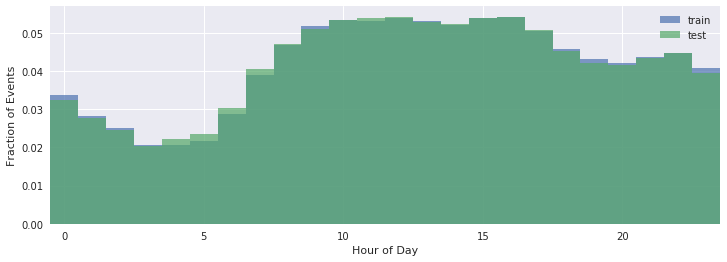

In [16]:
# train과 test의 시간 비교
# train과 test의 view 시간대 분포 거의 동일함
# train은 밤 늦은 시간 view가 좀 더 많은 편
# test는 오전 시간대 view가 좀 더 많은 편

test["hour"] = (test.timestamp // (3600 * 1000)) % 24
test["day"] = test.timestamp // (3600 * 24 * 1000)

train["hour"] = (train.timestamp // (3600 * 1000)) % 24
train["day"] = train.timestamp // (3600 * 24 * 1000)

plt.figure(figsize=(12,4))
train.hour.hist(bins=np.linspace(-0.5, 23.5, 25), label="train", alpha=0.7, normed=True)
test.hour.hist(bins=np.linspace(-0.5, 23.5, 25), label="test", alpha=0.7, normed=True)
plt.xlim(-0.5, 23.5)
plt.legend(loc="best")
plt.xlabel("Hour of Day")
plt.ylabel("Fraction of Events")

In [56]:
# train, test의 형태 확인
print(train.tail())
print(test.tail())

# train, test의 day, hour 최대값과 최소값
print(min(train.day), max(train.day))
print(min(train.hour), max(train.hour))
print(min(test.day), max(test.day))
print(min(test.hour), max(test.hour))

           ad_id  clicked  display_id            uuid  document_id  \
16874584  173400        0    16874585  6c23d6809274d4       479781   
16874590  142604        1    16874591  49396799cb3a40      2816969   
16874590   35805        0    16874591  49396799cb3a40      2816969   
16874591   36108        0    16874592  45f3b28fd8f19d      2823420   
16874592  153244        1    16874593  21f03d8a66e702      2777166   

           timestamp platform geo_location  hour  day  
16874584  1123198914        2        CA>AB    23   12  
16874590  1123199601        1    US>IN>582    23   12  
16874590  1123199601        1    US>IN>582    23   12  
16874591  1123199635        2           GB    23   12  
16874592  1123199936        2    US>NJ>501    23   12  
           ad_id  display_id            uuid  document_id   timestamp  \
23120121   96074    23120122  3b42aaa4aa8993      1827718  1295999574   
23120122  561507    23120123  7efccdc2d58fd1      2984543  1295999591   
23120123  516264    2312

Text(0,0.5,'Fraction of Events')

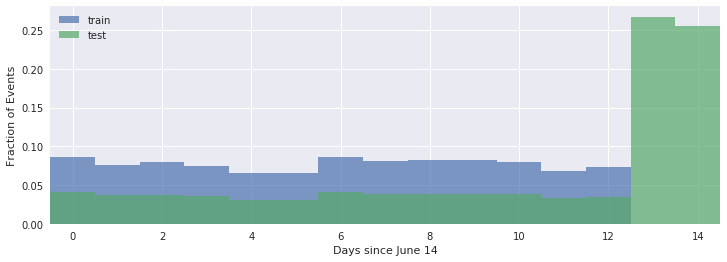

In [17]:
plt.figure(figsize=(12,4))
train.day.hist(bins=np.linspace(-.5, 14.5, 16), label="train", alpha=0.7, normed=True)
test.day.hist(bins=np.linspace(-.5, 14.5, 16), label="test", alpha=0.7, normed=True)
plt.xlim(-0.5, 14.5)
plt.legend(loc="best")
plt.xlabel("Days since June 14")
plt.ylabel("Fraction of Events")

In [18]:
# 3개 파일 결측치 확인
print(clicks_train.isnull().sum())
print(clicks_test.isnull().sum())
print(events.isnull().sum())
# events에서 geo_location 340개 결측값 있음

ad_id      0
clicked    0
dtype: int64
ad_id    0
dtype: int64
display_id        0
uuid              0
document_id       0
timestamp         0
platform          0
geo_location    340
dtype: int64


In [19]:
# 340개 결측값 geo_null에 저장
geo_null = events[events.geo_location.isnull() == True]
print(geo_null.head())

        display_id            uuid  document_id  timestamp platform  \
63981        63982  f8a603cb663c2c      1128355    5203379        2   
73403        73404  a29364adf8b637      1179111    6116120        2   
109101      109102  e0dd249c56b0ca      1755112    9850567        1   
125625      125626  3458c3a41673b4       842714   11800761        2   
138472      138473  c82547eaa595d1      1795026   13527549        1   

       geo_location  
63981           NaN  
73403           NaN  
109101          NaN  
125625          NaN  
138472          NaN  


In [20]:
print(len(clicks_train.ad_id.unique()))

478950


In [1]:
print(sum(clicks_train$display_id == clicks_test$display_id)/nrow(df) * 100)
print(sum(clicks_train$display_id == content$display_id)/nrow(df) * 100)
print(sum(clicks_test$display_id == content$display_id)/nrow(df) * 100)

SyntaxError: invalid syntax (<ipython-input-1-966717f852b9>, line 1)